In [1]:
BLOCK_SIZE = 16
ROUNDS = 8
p = "А ещё сторонники тоталитаризма в науке могут быть объективно рассмотрены соответствующими инстанциями. Современные технологии достигли такого уровня, что выбранный нами инновационный путь однозначно фиксирует необходимость приоритизации разума над эмоциями. Есть над чем задуматься: предприниматели в сети интернет в равной степени предоставлены сами себе. Также как консультация с широким активом не оставляет шанса для инновационных методов управления процессами. Но постоянное информационно-пропагандистское обеспечение нашей деятельности предопределяет высокую востребованность укрепления моральных ценностей"
k = "Под каждой крышей свои мыши"

In [6]:
def get_blocks(s: str):
    blocks = list()
    if len(s) % 2 != 0:
        s += '\0'
    s = s.encode('cp1251')
    for i in range(0, len(s), 2):
        blocks.append((s[i], s[i + 1]))
    return blocks

def cypher_round(p_block, k_round):
    p_block_L, p_block_R = p_block
    c_block_R = p_block_R ^ k_round
    rem = c_block_R // 128
    c_block_R <<= 1
    c_block_R %= 256
    c_block_R += rem
    c_block_R ^= p_block_L
    return (p_block_R, c_block_R)


round_results = list()
for r in range(ROUNDS):
    round_results.append(list())

def cypher(p_block,  k):
    k_ind = 0
    k = k.encode('cp1251')
    result = list()
    for block_ind in range(len(p_block)):
        curr_block = p_block[block_ind]
        for round in range(ROUNDS):
            round_results[round] += curr_block
            curr_block = cypher_round(curr_block, k[k_ind % len(k)])
            k_ind += 1
        result += curr_block
    return result

p_blocks = get_blocks(p)
cyphered_bytes = cypher(p_blocks, k)
round_results.append(cyphered_bytes)

#print(cyphered_blocks)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

0


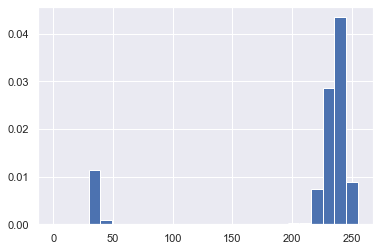

1


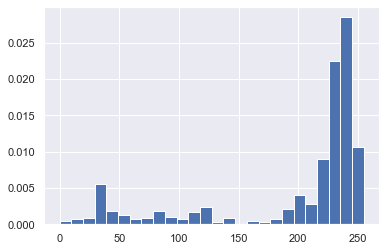

2


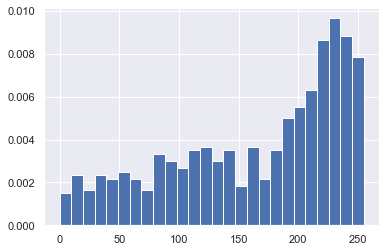

3


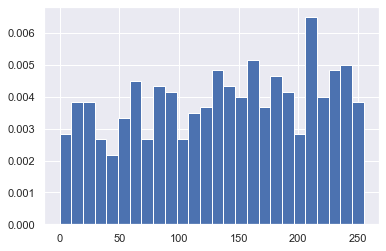

4


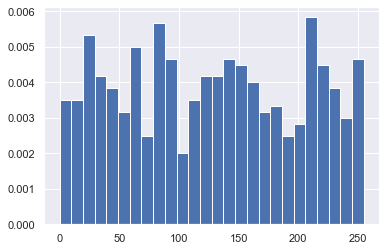

5


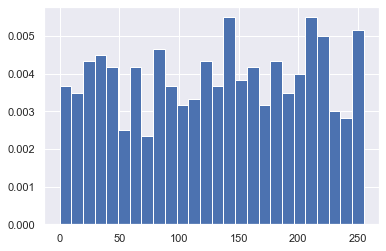

6


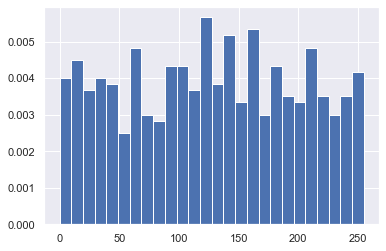

7


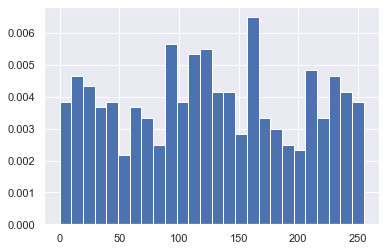

8


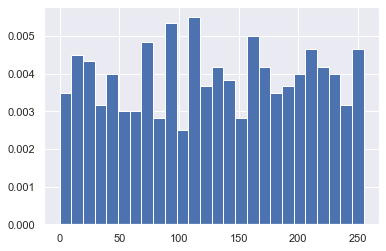

In [8]:
for r in range(len(round_results)):
    print(r)
    plt.hist(round_results[r], range=(0, 255), bins=26, density=True)
    plt.show()
    